## Machine learning Lab 6
## Graph Based Clustering
#### Name: Hasrhvardhan Singh
#### Roll Number : 1019161


In [5]:
import talib as ta 
from pandas_datareader import data as pdr 
import yfinance as yf 

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [7]:
import warnings 
warnings.filterwarnings('ignore') 


In [8]:
yf.pdr_override() 
threshold = 0.75 


In [9]:
df = pdr.get_data_yahoo('GOOG', '2000-01-01', '2018-01-01') 
df = df[df.columns[df.isnull().mean() < threshold]] 
df = df.loc[df.isnull().mean(axis=1) < threshold] 
df = df.dropna() 
df = df.iloc[:,:4] 
df.head() 



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133
2004-08-20,2.515820,2.716817,2.503118,2.697639
2004-08-23,2.758411,2.826406,2.716070,2.724787
2004-08-24,2.770615,2.779581,2.579581,2.611960
2004-08-25,2.614201,2.689918,2.587302,2.640104


In [10]:
upper_lim = df['Close'].quantile(.95) 
lower_lim = df['Close'].quantile(.05) 
df = df[(df['Close'] < upper_lim) & (df['Close'] > lower_lim)] 

In [11]:
upper_lim = df['Open'].quantile(.95) 
lower_lim = df['Open'].quantile(.05) 
df = df[(df [ 'Open'] < upper_lim) & (df['Open'] > lower_lim)] 

In [12]:
df['S_10'] = df['Close'].rolling(window=10).mean() 
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10']) 
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10) 
df['Open-Close'] = df['Open'] - df['Close'].shift(1) 
df[ 'Open-Open'] = df [ 'Open'] - df [ 'Open'].shift(1) 
df = df.dropna() 

In [13]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df) 
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame (X_normalized) 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd. DataFrame(X_principal) 
X_principal.columns = ['Open-Close', 'Open-Open'] 
X_principal.head(2) 



,Open-Close,Open-Open
0,-0.660956,-0.534079
1,-0.662805,-0.545855


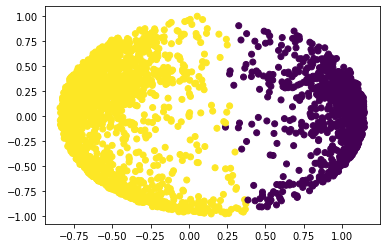

In [14]:
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 
plt.scatter(X_principal['Open-Close'], X_principal['Open-Open'],c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors').fit_predict(X_principal))


In [15]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
labels_nn = spectral_model_nn.fit_predict(X_principal) 

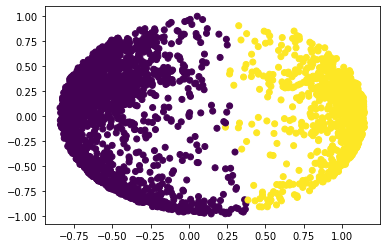

In [16]:
plt.scatter(X_principal['Open-Close'], X_principal['Open-Open'], 
c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors').fit_predict(X_principal))
plt.show()

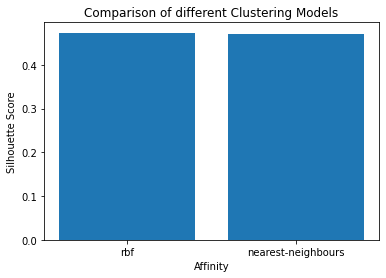

[0.47319397822466186, 0.47107425929598745]


In [17]:
affinity = ['rbf', 'nearest-neighbours'] 
S_scores = [] 
S_scores.append(silhouette_score(df, labels_rbf)) 
S_scores.append(silhouette_score(df, labels_nn)) 
plt.bar(affinity, S_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 
print(S_scores) 
